In [91]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfFile, PdfPages
import pandas as pd
import numpy as np
import seaborn as sns
pdfFile = PdfPages("fire_analyzis_Brazil.pdf")
df = pd.read_excel('amazon_insight_quiz.xls')
# Change month with english
df = df.replace(['Janeiro', 'Fevereiro', 'Março','Abril', 'Maio', 'Junho','Julho', 'Agosto','Setembro', 'Outubro', 'Novembro', 'Dezembro'], ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'July','Agu','Sept', 'Oct', 'Nov','Dec'])
print(df.head(12))
df.info()
#normalize the number with dot
for i in range(len(df)):
  if df['number'].iloc[i]-int(df['number'].iloc[i]) !=0:
    df['number'].iloc[i]=df['number'].iloc[i]*1000



    year state month  number       date
0   1998  Acre   Jan     0.0 1998-01-01
1   1998  Acre   Feb     0.0 1998-01-01
2   1998  Acre   Mar     0.0 1998-01-01
3   1998  Acre   Apr     0.0 1998-01-01
4   1998  Acre   Mai     0.0 1998-01-01
5   1998  Acre   Jun     3.0 1998-01-01
6   1998  Acre  July    37.0 1998-01-01
7   1998  Acre   Agu   130.0 1998-01-01
8   1998  Acre  Sept   509.0 1998-01-01
9   1998  Acre   Oct    44.0 1998-01-01
10  1998  Acre   Nov     0.0 1998-01-01
11  1998  Acre   Dec     7.0 1998-01-01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory 

<ipython-input-91-67ca0da5ee36>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number'].iloc[i]=df['number'].iloc[i]*1000


<ipython-input-92-25294e476708>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_month = df.groupby('month', sort=False).sum().reset_index()


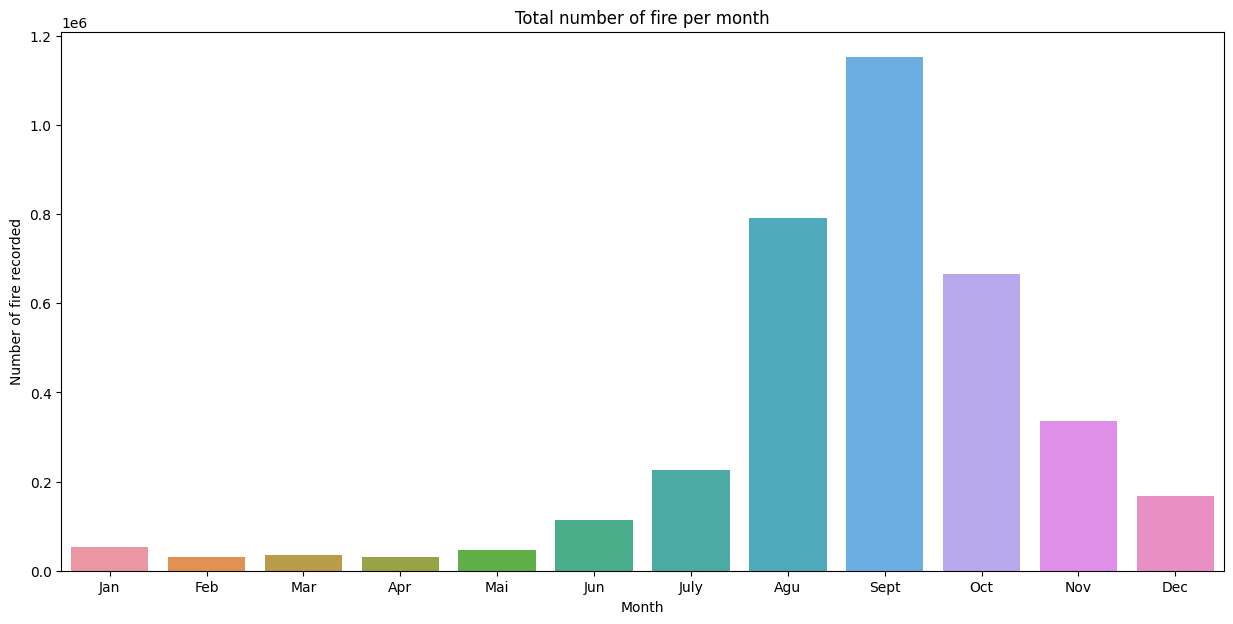

In [92]:
df_month = df.groupby('month', sort=False).sum().reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=df_month['month'], y=df_month['number'])
plt.xlabel('Month')
plt.ylabel('Number of fire recorded')
plt.title(label="Total number of fire per month")

pdfFile.savefig()
# Conclusion: High number of fire occure on August to October

<ipython-input-93-3f5bc40a3f73>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year = df.groupby('year').sum().reset_index()


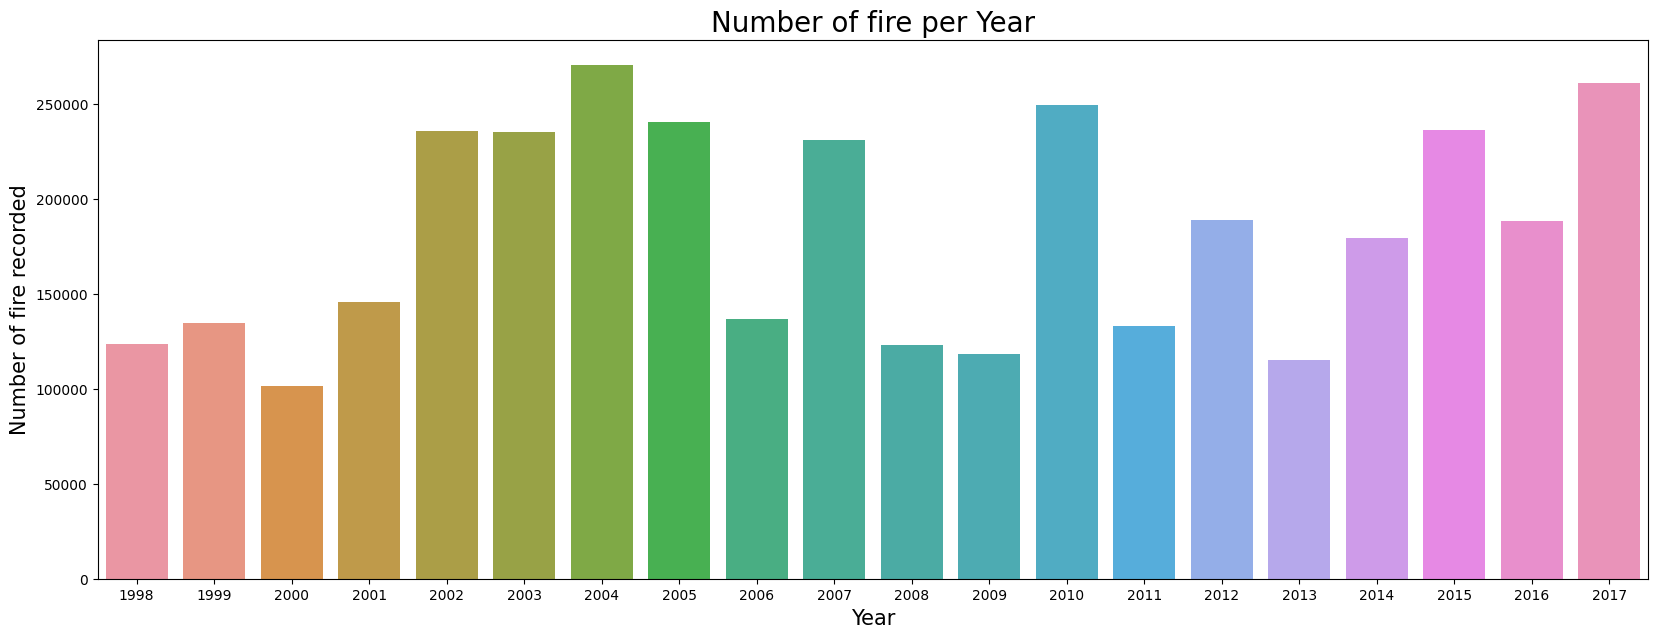

In [93]:
df_year = df.groupby('year').sum().reset_index()
plt.figure(figsize=(20,7))
plt.xticks(np.arange(1998, 2018, 1))
sns.barplot(x = df_year['year'], y = df_year['number'])
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of fire recorded', fontsize=15)
plt.title(label = 'Number of fire per Year', fontsize=20)

pdfFile.savefig()
# Conclusion: During the 10 last year, the number of the fire increase (especialy in 2004, 2010and 2017) and decrease (in 2008, 2009, 2013)

<ipython-input-94-34a7653961a0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_state = df.groupby('state').mean().reset_index()


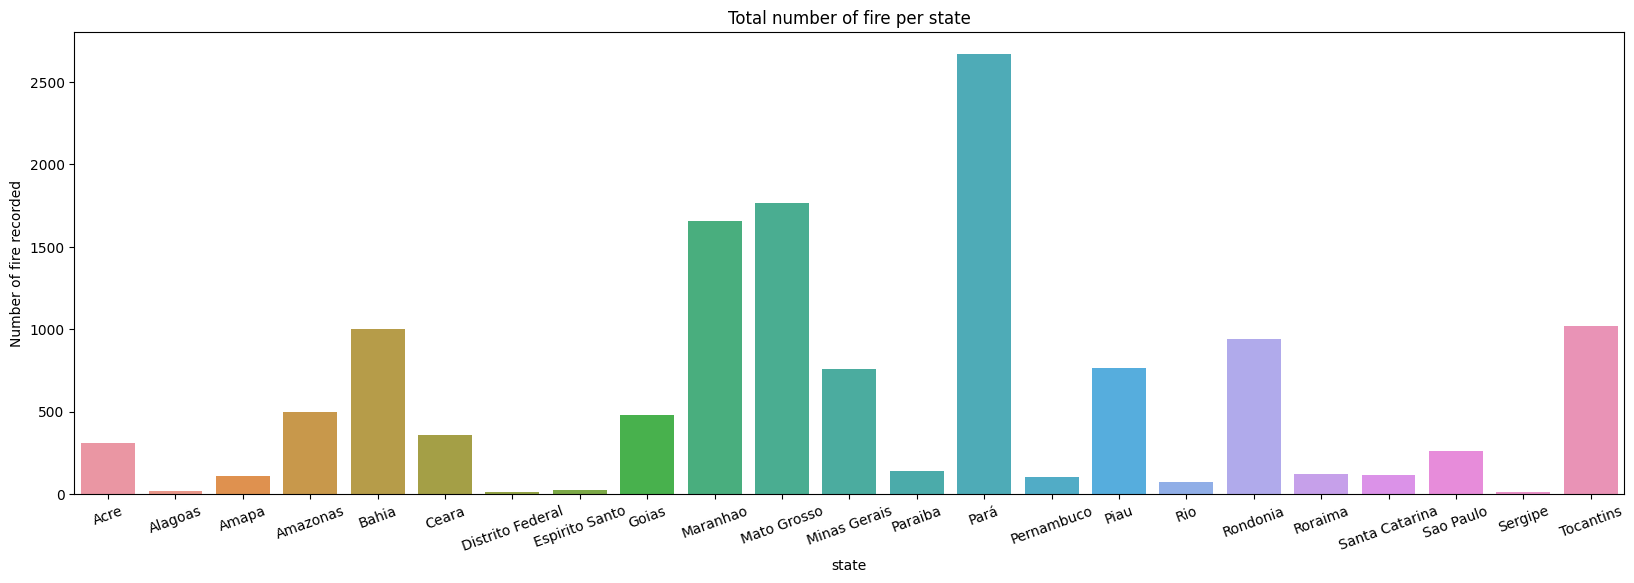

In [94]:
df_state = df.groupby('state').mean().reset_index()
plt.figure(figsize=(20,6))
sns.barplot(x=df_state['state'], y=df_state['number'])
plt.xticks(rotation=20)
plt.xlabel('state')
plt.ylabel('Number of fire recorded')
plt.title(label="Total number of fire per state")

pdfFile.savefig()
# Conclusion: The state that have the high number of fire is Para and after Mato Grosso, Maranhao

<ipython-input-95-79a1760d64da>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_state_para.groupby('month', sort=False).mean().reset_index()


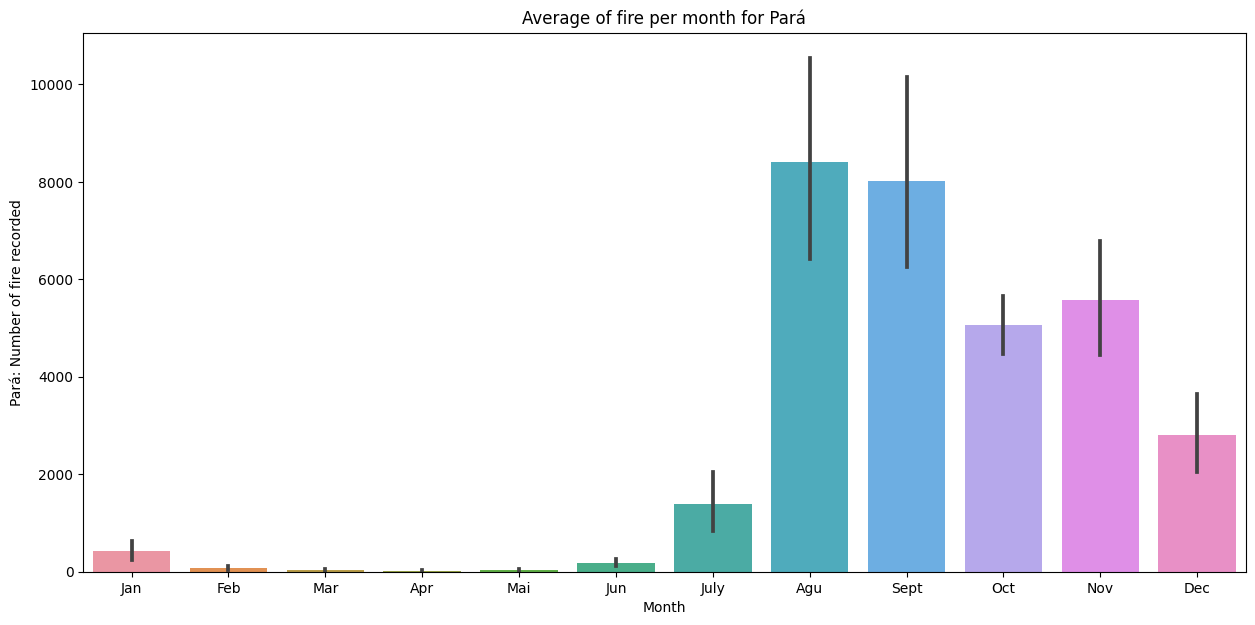

In [95]:

df_state_para = df.loc[(df['state']=='Pará')]
df_state_para.groupby('month', sort=False).mean().reset_index()
plt.figure(figsize=(15,7))
sns.barplot(x=df_state_para['month'], y=df_state_para['number'])
plt.xlabel('Month')
plt.ylabel('Pará: Number of fire recorded')
plt.title(label="Average of fire per month for Pará")

pdfFile.savefig()
# Para presents high number of fire in the second semester of the year




In [96]:
pdfFile.close()